**Importing** **Libraries**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dataset From Drive**

In [ ]:
train_dir='/content/drive/MyDrive/Infosys Project Team 3 PDC/Plant Disease Dataset/train'
test_dir='/content/drive/MyDrive/Infosys Project Team 3 PDC/Plant Disease Dataset/test'
validation_dir='/content/drive/MyDrive/Infosys Project Team 3 PDC/Plant Disease Dataset/validation'

**Preprocessing**

In [ ]:
img_width, img_height = 256, 256
batch_size =256
num_classes = 38
epochs =3

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 36448 images belonging to 38 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 16695 images belonging to 38 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7169 images belonging to 38 classes.


**Modelling**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

**Training The Model**

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/3
142/142 [==============================] - 17548s 124s/step - loss: 3.0824 - accuracy: 0.3154 - val_loss: 1.1684 - val_accuracy: 0.6903
Epoch 2/3
142/142 [==============================] - 7054s 50s/step - loss: 1.3437 - accuracy: 0.5759 - val_loss: 0.7733 - val_accuracy: 0.7647
Epoch 3/3
142/142 [==============================] - 7050s 50s/step - loss: 1.0633 - accuracy: 0.6552 - val_loss: 0.5760 - val_accuracy: 0.8145


In [ ]:
model.save('/content/drive/MyDrive/Infosys Project Team 3 PDC/Team3model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

28/28 [==============================] - 2228s 82s/step - loss: 1.0092 - accuracy: 0.6508


In [ ]:
print(f'Test accuracy: {test_accuracy:.2f}')

Test accuracy: 0.65


In [ ]:
model.save('Team3.h5')

**Visualization**

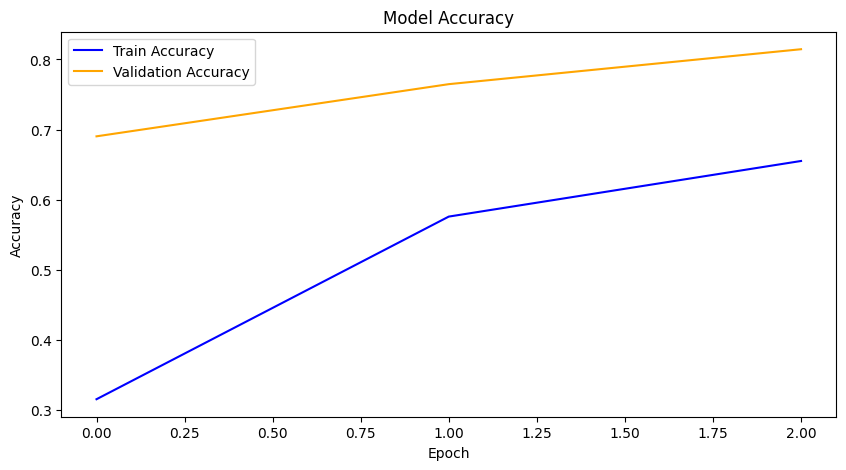

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
trained_model=tf.keras.models.load_model('Team3model.h5')

In [ ]:
class_labels = list(train_generator.class_indices.keys())

**Testing**

In [ ]:
image_path = '/content/drive/MyDrive/Infosys Project Team 3 PDC/Plant Disease Dataset/test/Corn-healthy/052169e1-a51d-4ff7-8b70-f07f3d2500c5___R.S_HL 0650 copy 2.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
input_arr = input_arr / 255.0

In [ ]:
predictions = trained_model.predict(input_arr)
print(predictions)

1/1 [==============================] - 0s 73ms/step
[[1.0074284e-05 2.9442158e-06 3.6323983e-02 7.3680729e-02 2.9334690e-02
  1.3595779e-01 8.9327775e-02 5.1015080e-04 1.7400071e-04 5.3220439e-01
  2.0164591e-03 2.6431062e-05 3.2934809e-06 2.5656798e-06 1.3977437e-05
  9.7521782e-02 1.7833398e-03 3.6654028e-04 3.6446227e-06 3.5185561e-08
  2.8029301e-06 1.9125491e-05 9.6542462e-06 1.3402621e-05 4.3605305e-05
  7.8974903e-05 1.5551133e-04 2.2015711e-06 1.9305757e-05 8.7050365e-05
  1.4479836e-07 1.9025420e-04 6.8997624e-06 1.1763560e-09 2.7604010e-06
  8.8634374e-07 7.1210728e-08 1.0286103e-04]]


In [ ]:
result_index = np.argmax(predictions)
print(result_index)

9


In [ ]:
model_prediction = class_labels[result_index]

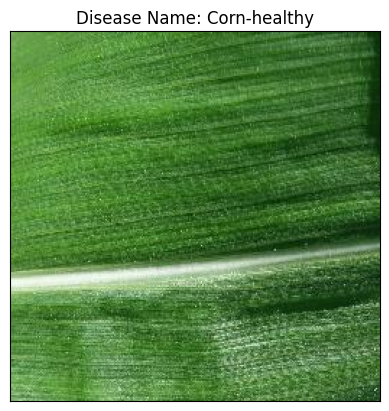

In [ ]:
plt.imshow(image)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()